In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import zscore
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression , Lasso , Ridge
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.preprocessing import TargetEncoder

In [ ]:
data=pd.read_csv(r"/content/drive/MyDrive/car_price_prediction.csv")
data

,ID,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags
0,45654403,13328,1399,LEXUS,RX 450,2010,Jeep,Yes,Hybrid,3.5,186005 km,6.0,Automatic,4x4,04-May,Left wheel,Silver,12
1,44731507,16621,1018,CHEVROLET,Equinox,2011,Jeep,No,Petrol,3,192000 km,6.0,Tiptronic,4x4,04-May,Left wheel,Black,8
2,45774419,8467,-,HONDA,FIT,2006,Hatchback,No,Petrol,1.3,200000 km,4.0,Variator,Front,04-May,Right-hand drive,Black,2
3,45769185,3607,862,FORD,Escape,2011,Jeep,Yes,Hybrid,2.5,168966 km,4.0,Automatic,4x4,04-May,Left wheel,White,0
4,45809263,11726,446,HONDA,FIT,2014,Hatchback,Yes,Petrol,1.3,91901 km,4.0,Automatic,Front,04-May,Left wheel,Silver,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19232,45798355,8467,-,MERCEDES-BENZ,CLK 200,1999,Coupe,Yes,CNG,2.0 Turbo,300000 km,4.0,Manual,Rear,02-Mar,Left wheel,Silver,5
19233,45778856,15681,831,HYUNDAI,Sonata,2011,Sedan,Yes,Petrol,2.4,161600 km,4.0,Tiptronic,Front,04-May,Left wheel,Red,8
19234,45804997,26108,836,HYUNDAI,Tucson,2010,Jeep,Yes,Diesel,2,116365 km,4.0,Automatic,Front,04-May,Left wheel,Grey,4
19235,45793526,5331,1288,CHEVROLET,Captiva,2007,Jeep,Yes,Diesel,2,51258 km,4.0,Automatic,Front,04-May,Left wheel,Black,4


In [ ]:
data.shape

(19237, 18)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19237 entries, 0 to 19236
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ID                19237 non-null  int64  
 1   Price             19237 non-null  int64  
 2   Levy              19237 non-null  object 
 3   Manufacturer      19237 non-null  object 
 4   Model             19237 non-null  object 
 5   Prod. year        19237 non-null  int64  
 6   Category          19237 non-null  object 
 7   Leather interior  19237 non-null  object 
 8   Fuel type         19237 non-null  object 
 9   Engine volume     19237 non-null  object 
 10  Mileage           19237 non-null  object 
 11  Cylinders         19237 non-null  float64
 12  Gear box type     19237 non-null  object 
 13  Drive wheels      19237 non-null  object 
 14  Doors             19237 non-null  object 
 15  Wheel             19237 non-null  object 
 16  Color             19237 non-null  object

In [ ]:
data.duplicated().sum()

np.int64(313)

In [ ]:
data=data.drop_duplicates()

In [ ]:
data.duplicated().sum()

np.int64(0)

In [ ]:
#in levy some rows are -
#so check how many are like -.then convert it null then fill by mean
data["Levy"].nunique()

559

In [ ]:
(data["Levy"]=="-").sum()

np.int64(5709)

In [ ]:
# filling that (-) with NAN
data["Levy"]=data["Levy"].replace("-",np.nan)

/tmp/ipython-input-256966250.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["Levy"]=data["Levy"].replace("-",np.nan)


In [ ]:
#then converting that to nummeric
data["Levy"]=pd.to_numeric(data["Levy"])

/tmp/ipython-input-871585044.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["Levy"]=pd.to_numeric(data["Levy"])


In [ ]:
data["Levy"].isnull().sum()                       #checking missing value

np.int64(5709)

In [ ]:
#fill  issing value
data["Levy"].fillna(data["Levy"].median(),inplace=True)

/tmp/ipython-input-3951381281.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data["Levy"].fillna(data["Levy"].median(),inplace=True)
/tmp/ipython-input-3951381281.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["Levy"].fillna(data["Levy"].median(),inplace=True)


In [ ]:
data["Levy"].isnull().sum()

np.int64(0)

In [ ]:
data["Manufacturer"].value_counts()

,count
Manufacturer,
HYUNDAI,3729
TOYOTA,3606
MERCEDES-BENZ,2043
FORD,1088
CHEVROLET,1047
...,...
LAMBORGHINI,1
PONTIAC,1
SATURN,1


In [ ]:
#grouping rare brands into "other"
counts=data["Manufacturer"].value_counts()
rare_brands=counts[counts<50].index
data["Manufacturer"]=data["Manufacturer"].replace(rare_brands,"other")

/tmp/ipython-input-1570724592.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["Manufacturer"]=data["Manufacturer"].replace(rare_brands,"other")


In [ ]:
data["Manufacturer"].value_counts()

,count
Manufacturer,
HYUNDAI,3729
TOYOTA,3606
MERCEDES-BENZ,2043
FORD,1088
CHEVROLET,1047
BMW,1036
HONDA,960
LEXUS,927
NISSAN,645


In [ ]:
data.columns

Index(['ID', 'Price', 'Levy', 'Manufacturer', 'Model', 'Prod. year',
       'Category', 'Leather interior', 'Fuel type', 'Engine volume', 'Mileage',
       'Cylinders', 'Gear box type', 'Drive wheels', 'Doors', 'Wheel', 'Color',
       'Airbags'],
      dtype='object')

In [ ]:
data.isnull().sum()

,0
ID,0
Price,0
Levy,0
Manufacturer,0
Model,0
Prod. year,0
Category,0
Leather interior,0
Fuel type,0
Engine volume,0


In [ ]:
data.drop("Doors",axis=1,inplace=True)
data.drop("ID",axis=1,inplace=True)
data.drop("Model",axis=1,inplace=True)

/tmp/ipython-input-3365452752.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.drop("Doors",axis=1,inplace=True)
/tmp/ipython-input-3365452752.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.drop("ID",axis=1,inplace=True)
/tmp/ipython-input-3365452752.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.drop("Model",axis=1,inplace=True)


In [ ]:
data.nunique().sort_values()


,0
Leather interior,2
Wheel,2
Drive wheels,3
Gear box type,4
Fuel type,7
Category,11
Cylinders,13
Color,16
Airbags,17
Manufacturer,24


In [ ]:
#renaming milage col
data=data.rename(columns={"Mileage":"Distance_driven"})

In [ ]:
data.columns


Index(['Price', 'Levy', 'Manufacturer', 'Prod. year', 'Category',
       'Leather interior', 'Fuel type', 'Engine volume', 'Distance_driven',
       'Cylinders', 'Gear box type', 'Drive wheels', 'Wheel', 'Color',
       'Airbags'],
      dtype='object')

In [ ]:
#check distribution of category
data["Category"].value_counts()

,count
Category,
Sedan,8600
Jeep,5378
Hatchback,2799
Minivan,633
Coupe,528
Universal,361
Microbus,299
Goods wagon,229
Pickup,51


In [ ]:
#combine rare category into other
counts=data["Category"].value_counts()
rare=counts[counts<50].index
data["Category"]=data["Category"].replace(rare,"other")

In [ ]:
data["Category"].value_counts()

,count
Category,
Sedan,8600
Jeep,5378
Hatchback,2799
Minivan,633
Coupe,528
Universal,361
Microbus,299
Goods wagon,229
Pickup,51


In [ ]:
data["Fuel type"].value_counts()

,count
Fuel type,
Petrol,9944
Diesel,4001
Hybrid,3539
LPG,885
CNG,469
Plug-in Hybrid,85
Hydrogen,1


In [ ]:
data["Gear box type"].value_counts()

,count
Gear box type,
Automatic,13282
Tiptronic,3065
Manual,1844
Variator,733


In [ ]:
data["Drive wheels"].value_counts()

,count
Drive wheels,
Front,12695
4x4,3969
Rear,2260


In [ ]:
data.isnull().sum().sum()

np.int64(0)

In [ ]:
data.shape

(18924, 15)

In [ ]:
data.head()

,Price,Levy,Manufacturer,Prod. year,Category,Leather interior,Fuel type,Engine volume,Distance_driven,Cylinders,Gear box type,Drive wheels,Wheel,Color,Airbags
0,13328,1399.0,LEXUS,2010,Jeep,Yes,Hybrid,3.5,186005 km,6.0,Automatic,4x4,Left wheel,Silver,12
1,16621,1018.0,CHEVROLET,2011,Jeep,No,Petrol,3,192000 km,6.0,Tiptronic,4x4,Left wheel,Black,8
2,8467,781.0,HONDA,2006,Hatchback,No,Petrol,1.3,200000 km,4.0,Variator,Front,Right-hand drive,Black,2
3,3607,862.0,FORD,2011,Jeep,Yes,Hybrid,2.5,168966 km,4.0,Automatic,4x4,Left wheel,White,0
4,11726,446.0,HONDA,2014,Hatchback,Yes,Petrol,1.3,91901 km,4.0,Automatic,Front,Left wheel,Silver,4


In [ ]:

data['Engine volume']=data["Engine volume"].str.replace("Turbo","")

In [ ]:
#now convert to float
data["Engine volume"]=pd.to_numeric(data["Engine volume"])

In [ ]:
data["Distance_driven"]=data["Distance_driven"].str.replace("km","")

In [ ]:
data["Distance_driven"]=data["Distance_driven"].astype(int)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 18924 entries, 0 to 19236
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Price             18924 non-null  int64  
 1   Levy              18924 non-null  float64
 2   Manufacturer      18924 non-null  object 
 3   Prod. year        18924 non-null  int64  
 4   Category          18924 non-null  object 
 5   Leather interior  18924 non-null  object 
 6   Fuel type         18924 non-null  object 
 7   Engine volume     18924 non-null  float64
 8   Distance_driven   18924 non-null  int64  
 9   Cylinders         18924 non-null  float64
 10  Gear box type     18924 non-null  object 
 11  Drive wheels      18924 non-null  object 
 12  Wheel             18924 non-null  object 
 13  Color             18924 non-null  object 
 14  Airbags           18924 non-null  int64  
dtypes: float64(3), int64(4), object(8)
memory usage: 2.3+ MB


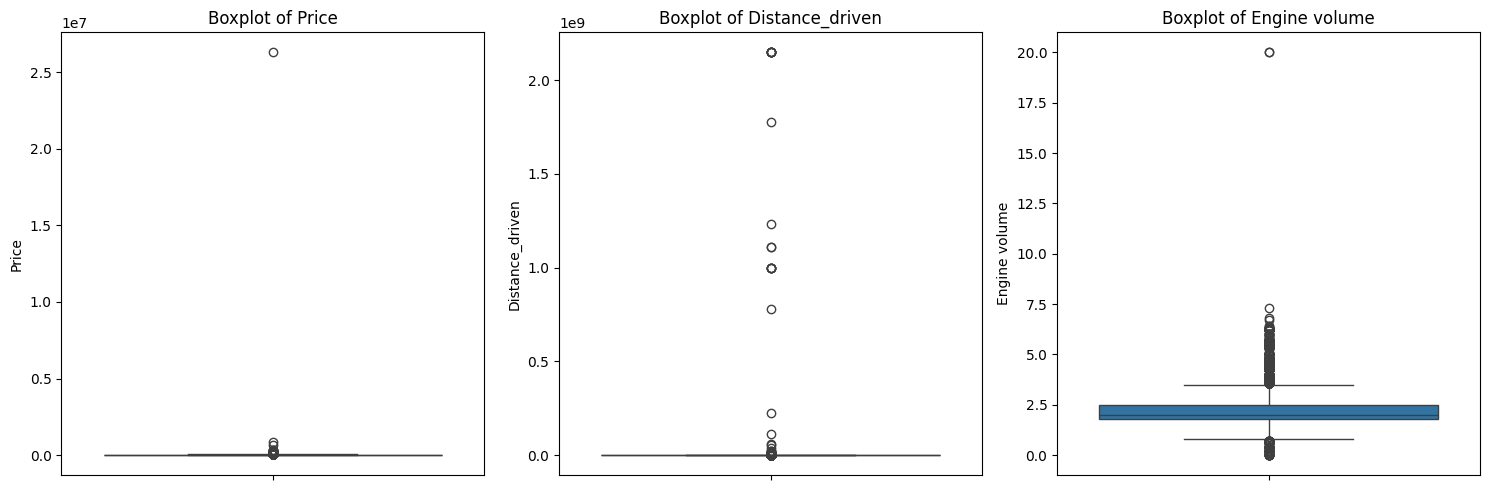

In [ ]:
columns_to_plot = ['Price', 'Distance_driven', 'Engine volume']

plt.figure(figsize=(15, 5))
for i, column in enumerate(columns_to_plot):
    plt.subplot(1, len(columns_to_plot), i + 1)
    sns.boxplot(y=data[column])
    plt.title(f'Boxplot of {column}')
    plt.ylabel(column)
plt.tight_layout()
plt.show()

In [ ]:
data.Price.skew()

np.float64(135.38772637953886)

In [ ]:
data.duplicated().sum()

np.int64(3217)

In [ ]:
data=data.drop_duplicates()

In [ ]:
data.Price.skew()

np.float64(123.5704003072932)

In [ ]:
#applying log for price
data["Price_log"] = np.log1p(data["Price"])
print(data["Price_log"].skew())

-1.7960450901713965


<Axes: ylabel='Price_log'>

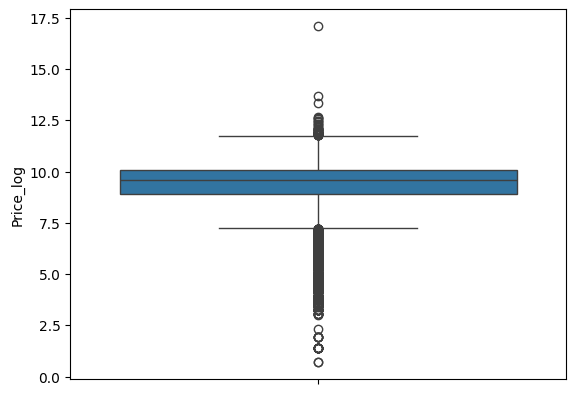

In [ ]:
#still some outliers present
sns.boxplot(y=data["Price_log"])

In [ ]:
#removing outlier for price
Q1 = data["Price_log"].quantile(0.25)
Q3 = data["Price_log"].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

df_clean = data[(data["Price_log"] >= lower_bound) & (data["Price_log"] <= upper_bound)]

In [ ]:
data.shape , df_clean.shape

((15707, 16), (14111, 16))

<Axes: ylabel='Price_log'>

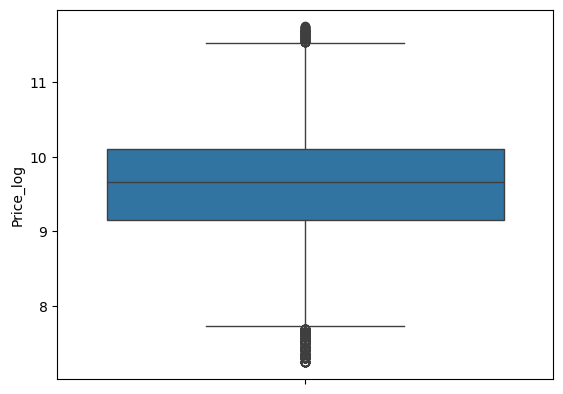

In [ ]:
sns.boxplot(y=df_clean["Price_log"])

<Axes: >

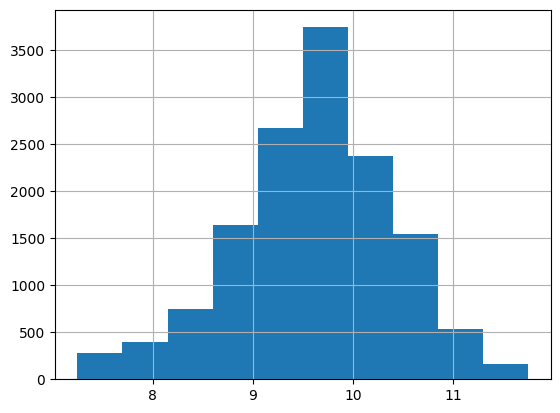

In [ ]:
#checking skewness
df_clean["Price_log"].hist()

<Axes: ylabel='Distance_driven'>

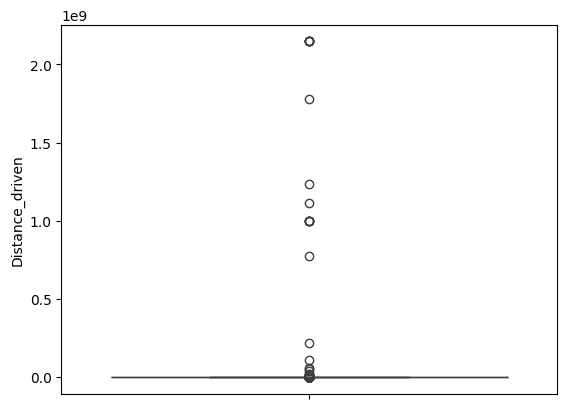

In [ ]:
#checking outlier for mileage
sns.boxplot(y=df_clean["Distance_driven"])

In [ ]:
df_clean["Distance_driven"].skew()

np.float64(35.58088500978697)

In [ ]:
#applying log on mileage
df_clean["Mileage_log"] = np.log1p(df_clean["Distance_driven"])

/tmp/ipython-input-2934769641.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean["Mileage_log"] = np.log1p(df_clean["Distance_driven"])


In [ ]:
df_clean["Mileage_log"].skew()

np.float64(-3.6874703037591186)

<Axes: ylabel='Mileage_log'>

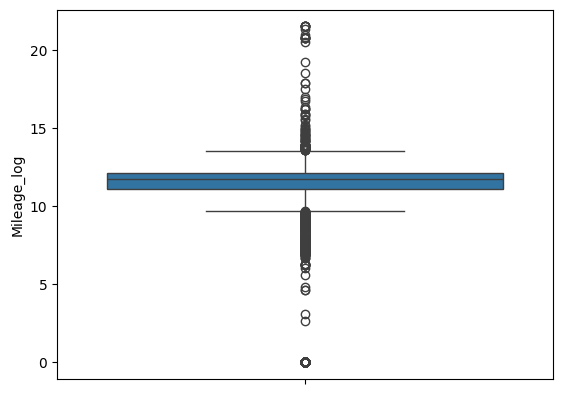

In [ ]:
sns.boxplot(y=df_clean["Mileage_log"])

In [ ]:
df_clean.shape

(14111, 17)

In [ ]:
Q1 = df_clean["Price_log"].quantile(0.25)
Q3 = df_clean["Price_log"].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

df_clean = df_clean[(df_clean["Price_log"] >= lower_bound) & (df_clean["Price_log"] <= upper_bound)]

In [ ]:
df_clean.shape

(13774, 17)

<Axes: ylabel='Engine volume'>

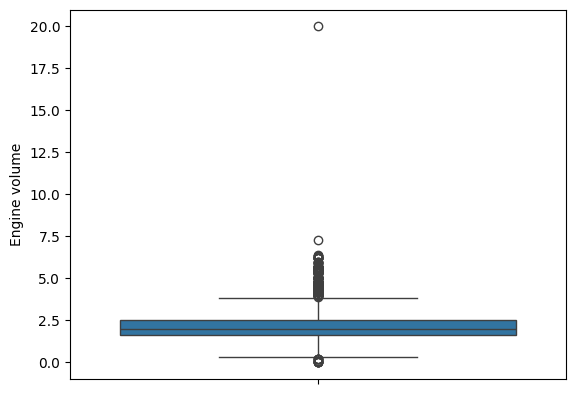

In [ ]:
#for engine volume
sns.boxplot(y=df_clean["Engine volume"])

In [ ]:
df_clean["Engine volume"].skew()

np.float64(2.487331146217697)

In [ ]:
df_clean["Volume_log"] = np.log1p(df_clean["Engine volume"])              #applying log on engine volume

/tmp/ipython-input-1081330774.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean["Volume_log"] = np.log1p(df_clean["Engine volume"])


In [ ]:
df_clean["Volume_log"].skew()

np.float64(0.8093357548230863)

<Axes: ylabel='Volume_log'>

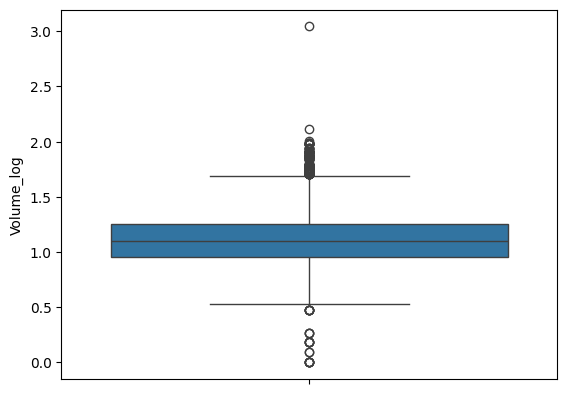

In [ ]:
sns.boxplot(y=df_clean["Volume_log"])

In [ ]:
df_clean.shape

(13774, 18)

In [ ]:
Q1 = df_clean["Volume_log"].quantile(0.25)
Q3 = df_clean["Volume_log"].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

df_clean = df_clean[(df_clean["Volume_log"] >= lower_bound) & (df_clean["Volume_log"] <= upper_bound)]

In [ ]:
df_clean.shape

(13407, 18)

<Axes: ylabel='Volume_log'>

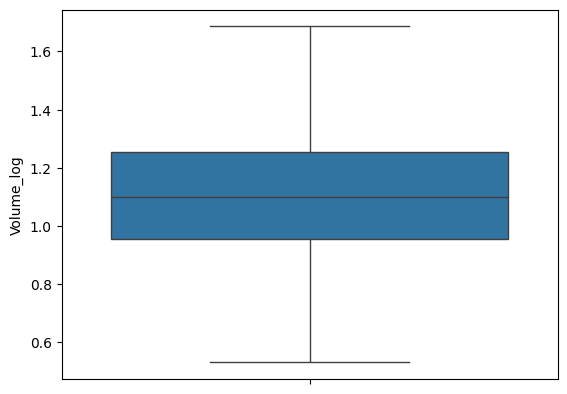

In [ ]:
sns.boxplot(y=df_clean["Volume_log"])

In [ ]:
df_clean.head()

,Price,Levy,Manufacturer,Prod. year,Category,Leather interior,Fuel type,Engine volume,Distance_driven,Cylinders,Gear box type,Drive wheels,Wheel,Color,Airbags,Price_log,Mileage_log,Volume_log
0,13328,1399.0,LEXUS,2010,Jeep,Yes,Hybrid,3.5,186005,6.0,Automatic,4x4,Left wheel,Silver,12,9.497697,12.133534,1.504077
1,16621,1018.0,CHEVROLET,2011,Jeep,No,Petrol,3.0,192000,6.0,Tiptronic,4x4,Left wheel,Black,8,9.718482,12.165256,1.386294
2,8467,781.0,HONDA,2006,Hatchback,No,Petrol,1.3,200000,4.0,Variator,Front,Right-hand drive,Black,2,9.044050,12.206078,0.832909
3,3607,862.0,FORD,2011,Jeep,Yes,Hybrid,2.5,168966,4.0,Automatic,4x4,Left wheel,White,0,8.190909,12.037459,1.252763
4,11726,446.0,HONDA,2014,Hatchback,Yes,Petrol,1.3,91901,4.0,Automatic,Front,Left wheel,Silver,4,9.369649,11.428478,0.832909


<Axes: xlabel='count', ylabel='Manufacturer'>

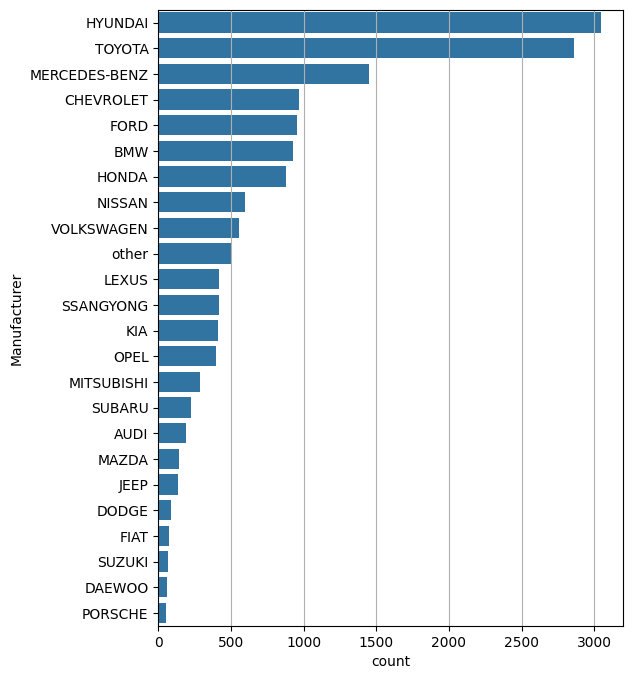

In [ ]:
plt.figure(figsize=(6, 8))
plt.grid()
sns.barplot(data.Manufacturer.value_counts(),orient="y")

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 15707 entries, 0 to 19236
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Price             15707 non-null  int64  
 1   Levy              15707 non-null  float64
 2   Manufacturer      15707 non-null  object 
 3   Prod. year        15707 non-null  float64
 4   Category          15707 non-null  object 
 5   Leather interior  15707 non-null  object 
 6   Fuel type         15707 non-null  object 
 7   Engine volume     15707 non-null  float64
 8   Distance_driven   15707 non-null  int64  
 9   Cylinders         15707 non-null  float64
 10  Gear box type     15707 non-null  object 
 11  Drive wheels      15707 non-null  object 
 12  Wheel             15707 non-null  object 
 13  Color             15707 non-null  object 
 14  Airbags           15707 non-null  float64
 15  Price_log         15707 non-null  float64
dtypes: float64(6), int64(2), object(8)
memory usa

In [ ]:
scaler = StandardScaler()
df_clean["Levy"] = scaler.fit_transform(df_clean[["Levy"]])
df_clean["Prod. year"] = scaler.fit_transform(df_clean[["Prod. year"]])
df_clean["Cylinders"] = scaler.fit_transform(df_clean[["Cylinders"]])
df_clean["Airbags"] = scaler.fit_transform(df_clean[["Airbags"]])
df_clean["Volume_log"] = scaler.fit_transform(df_clean[["Volume_log"]])
df_clean["Mileage_log"] = scaler.fit_transform(df_clean[["Mileage_log"]])
df_clean["Price_log"] = scaler.fit_transform(df_clean[["Price_log"]])

In [ ]:
data.head()

,Price,Levy,Manufacturer,Prod. year,Category,Leather interior,Fuel type,Engine volume,Distance_driven,Cylinders,Gear box type,Drive wheels,Wheel,Color,Airbags,Price_log
0,13328,1.547195,LEXUS,-0.086481,Jeep,Yes,Hybrid,3.5,186005,1.339203,Automatic,4x4,Left wheel,Silver,1.342638,9.497697
1,16621,0.486791,CHEVROLET,0.079903,Jeep,No,Petrol,3.0,192000,1.339203,Tiptronic,4x4,Left wheel,Black,0.358995,9.718482
2,8467,-0.172830,HONDA,-0.752020,Hatchback,No,Petrol,1.3,200000,-0.426059,Variator,Front,Right-hand drive,Black,-1.116470,9.044050
3,3607,0.052610,FORD,0.079903,Jeep,Yes,Hybrid,2.5,168966,-0.426059,Automatic,4x4,Left wheel,White,-1.608292,8.190909
4,11726,-1.105206,HONDA,0.579057,Hatchback,Yes,Petrol,1.3,91901,-0.426059,Automatic,Front,Left wheel,Silver,-0.624648,9.369649


In [ ]:
x= df_clean[['Levy', 'Manufacturer', 'Prod. year', 'Category', 'Leather interior',
       'Fuel type', 'Cylinders', 'Gear box type', 'Drive wheels', 'Wheel',
       'Color', 'Airbags', 'Mileage_log', 'Volume_log']]
y = df_clean["Price_log"]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    x, y, test_size=0.2, random_state=42
)

In [ ]:
cat_cols = x.select_dtypes(include='object').columns

In [ ]:
encoder = TargetEncoder()
X_train[cat_cols] = encoder.fit_transform(X_train[cat_cols], y_train)
X_test[cat_cols] = encoder.transform(X_test[cat_cols])

In [ ]:
### SVR

svr = SVR(kernel="rbf",
        C=300,
        epsilon=0.5)
svr.fit(X_train, y_train)

SVR(C=300, epsilon=0.5)

In [ ]:
predicted = svr.predict(X_test)

In [ ]:
mean_squared_error(y_test,predicted)

0.3607141391035769

In [ ]:
r2_score(y_test,predicted)

0.6430097071455123

In [ ]:
## Descision tree
tree = DecisionTreeRegressor(
    max_depth=10,
    min_samples_split=5,
    random_state=42)
tree.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=10, min_samples_split=5, random_state=42)

In [ ]:
pred = tree.predict(X_test)

In [ ]:
mean_squared_error(y_test,pred)

0.4207482700033481

In [ ]:
r2_score(y_test,pred)

0.5835953408985048

In [ ]:
## Linear Regression
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [ ]:
pred2 = lr.predict(X_test)

In [ ]:
mean_squared_error(y_test,pred2)

0.5929807661089851

In [ ]:
lasso = Lasso()
lasso.fit(X_train, y_train)

Lasso()

In [ ]:
pred = lasso.predict(X_test)

In [ ]:
mean_squared_error(y_test,pred)

1.0112761933717545

In [ ]:
r2_score(y_test,pred)

-0.0008362448051710825

In [ ]:
ridge = Ridge()
ridge.fit(X_train, y_train)

Ridge()

In [ ]:
pred = ridge.predict(X_test)
mean_squared_error(pred,y_test)

0.5929796072090967

In [ ]:
r2_score(pred,y_test)

-0.439383437668901